# Аналитика официального телеграм-канала города Иннаполис

Иннополис – первый и пока единственный российский город для ИТ-специалистов.
Сейчас там живут и работают более семи с половиной тысяч человек, и 68%
жителей переехали из других регионов РФ, а 6% — иностранные граждане. При этом
каждый третий житель в Иннополисе — ИТ-специалист или ученый.
На сегодняшний день в городе есть вся необходимая социальная инфраструктура:
детские сады, школа, ИТ-лицей, больница, городские пространства. Здесь открыт
первый в России ИТ-вуз — Университет Иннополис.
В Иннополисе 350 ИТ-компаний — все они резиденты или партнеры одноименной
Особой экономической зоны.


**Заказчик:** отдел маркетинга и PR города Иннополис.

**Цель:**

увеличение лояльной аудитории бренда путем увеличения количества
подписчиков телеграм-канала @innopolistg.
1. Повышение лояльности необходимо для того, чтобы читатели канала в
будущем стали жителями Иннополиса.
2. С 1 квартала 2024 года планируется монетизация ТГ-канала.


**Общее описание задачи:**

1. Анализ нынешнего состояния телеграм-канала города;

2. Выявление эффективных и неэффективных видов работы и поиск новых
способов привлечения аудитории.


В части аналитики данных необходимо выявить, наиболее эффективные и точные метрики для еженедельного/ежемесячного анализа работы.

Необходимо провести исследовательский анализ данных и:
1. Вывести метрики эффективности поста:
 - Тип публикации
 - Тема
 - Объем текста
 - Отсутствие / наличие эмодзи
 - Отсутствие / наличие изображений
 - Знаки препинания (сложность текста)
 - Облако слов
 - Определить самые популярные темы (больше реакций)
 - Определить минимально популярные темы (меньше реакций)
 - Определить лучшее время для публикаций (время максимального отклика ЦА)
2. Семантический анализ комментариев к постам, задачка понять, какие посты побуждают людей переехать/приехать в Иннополис. Условно, встречаются комментарии "хочу к вам", "как переехать?" и тд. Хотелось бы выстроить взаимосвязь.
3. Анализ эмодзи

**Предоставленные данные:**

1. Выгруженный с телеграм-канала @innopolistg датасет с данными по текстам постов, количеству просмотров, по эмодзи к постам. Данные выгруженны с марта 2022 по начало декабря 2023.
2. Выгруженный с телеграм-канала @innopolistg датасет с комментариями пользователей к выгруженным ранее постам. Данные выгруженны с марта 2022 по начало декабря 2023.

**Исследование пройдёт в 3 этапа:**

1. Предобработка данных
2. EDA
3. Выводы и рекомендации


## 1. Предобработка данных

### Импорт библиотек

In [ ]:
pip install --upgrade gspread # gspread библиотека python для работы с google sheets через api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


In [ ]:
pip install --upgrade emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
pip install wordcloud pandas

In [ ]:
pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 69.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=106a546dc44791fce972eafb203928494a7891c0e14f781ac530222204f2c1dc
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pandas as pd
import datetime as dt
import string
import re
import emoji
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import pymorphy2
import numpy as np
import plotly.express as px
from textblob import TextBlob
import warnings
# Отключаем предупреждения
warnings.simplefilter(action='ignore', category=FutureWarning)
import ast

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.colab import auth
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Ссылка на датасет с статистикой по каждому эмодзи, примененному в публикациях
# https://docs.google.com/spreadsheets/d/1GbX8lWvvMKxaEsFHBSLgoP2CJakWiZDhfQeUuYdYb4g/edit?usp=sharing
# Ссылка на датасет с комментариями
# https://docs.google.com/spreadsheets/d/1GJ_yIl3XYV8wlgTIwxQmo_Mx4YWi1U8wWp9g8rHjcXg/edit?usp=sharing


### Выгрузка данных

In [ ]:
# напишем функцию которая будет загружать датасеты в тетрадку с гугл диска
def read_google_disk(key, worksheet):
# запуск процесса аутентификации пользователя
  auth.authenticate_user()
# Получение учетных данных
  creds, _ = default()
# cоздание объекта gc для работы с Google Sheets
  gc = gspread.authorize(creds)
# Открытие таблицы по ключу и выбор листа
  sh = gc.open_by_key(key)
  worksheet = sh.worksheet(worksheet)
# Получение данных
  rows = worksheet.get_all_values()
# записываем данные в датасет
  df= pd.DataFrame.from_records(rows[1:], columns = rows[0])

  return df

In [ ]:
# df - датасет с статистикой по каждому эмодзи, примененному в публикациях
key = '1GbX8lWvvMKxaEsFHBSLgoP2CJakWiZDhfQeUuYdYb4g'
worksheet = 'posts'
df = read_google_disk(key, worksheet)

In [ ]:
# df_comments - датасет с комментариями
key1 = '1GJ_yIl3XYV8wlgTIwxQmo_Mx4YWi1U8wWp9g8rHjcXg'
worksheet1 = 'comments'
df_comments = read_google_disk(key1, worksheet1)

In [ ]:
# функция для вывода информации по таблице и проверки на явные дубликаты
def df_main_info(df):
    display(df.head(3), df.info())
    display('Кол-во явных дубликатов: ', df.duplicated().sum())

In [ ]:
# запуск df_main_info для posts, comments
df_main_info(df)
df_main_info(df_comments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0                    539 non-null    object
 1   index            539 non-null    object
 2   channel          539 non-null    object
 3   id               539 non-null    object
 4   date             539 non-null    object
 5   text             539 non-null    object
 6   views            539 non-null    object
 7   reactions_count  539 non-null    object
 8   comments         539 non-null    object
 9   type_attachment  539 non-null    object
 10  reactions        539 non-null    object
dtypes: object(11)
memory usage: 46.4+ KB


,,index,channel,id,date,text,views,reactions_count,comments,type_attachment,reactions
0,0,5,https://t.me/innopolistg,1421,2023-12-06 12:41:17+00:00,2023 год подходит к концу. И мы вспоминаем сам...,2294.0,45,4,MessageMediaPhoto,"{'_': 'MessageReactions', 'results': [{'_': 'R..."
1,1,6,https://t.me/innopolistg,1420,2023-12-05 06:01:58+00:00,В поисках новых подарков Дед Мороз заглянул в ...,2116.0,36,6,MessageMediaPhoto,"{'_': 'MessageReactions', 'results': [{'_': 'R..."
2,2,11,https://t.me/innopolistg,1415,2023-12-04 15:15:49+00:00,В первую неделю зимы слушаем классическую музы...,2175.0,22,3,MessageMediaPhoto,"{'_': 'MessageReactions', 'results': [{'_': 'R..."


None

'Кол-во явных дубликатов: '

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0                 2511 non-null   object
 1   post_id       2511 non-null   object
 2   date_comment  2511 non-null   object
 3   text_comment  2511 non-null   object
dtypes: object(4)
memory usage: 78.6+ KB


,,post_id,date_comment,text_comment
0,0,1421,2023-12-06 12:42:17+00:00,💔
1,1,1421,2023-12-06 12:42:40+00:00,
2,2,1421,2023-12-06 12:46:43+00:00,Предлагаю также в других номинациях голосовать...


None

'Кол-во явных дубликатов: '

0

Явных дубликатов нет, nan нет. Числовые данные и даты приведем к соответствующему формату.

### Подготовка данных для анализа

In [ ]:
#список columns, где необходимо изменить тип данных
change_type = ['index','id','views','reactions_count','comments']

# Преобразование в тип 'float'
for name in change_type:
    df[name] = df[name].astype('float')

# Преобразование в тип 'int', игнорируя значения с десятичной частью
df[change_type] = df[change_type].astype('int', errors='ignore')
# удалим дублирующий столбец индекса
df.drop(columns='', inplace=True)
# преобразование в тип datetime
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')
# Удаление временной зоны
df.date = df.date.dt.tz_localize(None)

In [ ]:
# удалим дублирующий столбец индекса
df_comments.drop(columns='', inplace=True)
# преобразование в тип 'int'
df_comments['post_id'] = df_comments['post_id'].astype('int')
# преобразование в тип datetime
df_comments.date_comment = pd.to_datetime(df_comments.date_comment, format='%Y-%m-%d %H:%M:%S')
# Удаление временной зоны
df_comments.date_comment = df_comments.date_comment.dt.tz_localize(None)

In [ ]:
# посмотрим данные в категореальном столбце type_attachment
df['type_attachment'].value_counts()

MessageMediaPhoto       433
MessageMediaDocument     50
                         48
MessageMediaWebPage       8
Name: type_attachment, dtype: int64

### Объем текста

In [ ]:
# Функция для подсчета суммы символов текстов
def len_text_count(text):
    return sum(len(str(x)) for x in text)

# Создание нового столбца 'count_text'
df['text_word'] = df['text'].apply(len_text_count)

### Знаки препинания (сложность текста)

In [ ]:
# Функция для подсчета количества знаков препинания
def count_punctuation(text):
    # Исключаем ссылки из текста
    text_without_links = re.sub(r'http\S+', '', text)

    # Считаем знаки препинания
    return sum(text_without_links.count(punctuation) for punctuation in string.punctuation)

# Создание нового столбца 'punctuation_count'
df['punctuation_count'] = df['text'].apply(count_punctuation)


### Отсутствие / наличие эмодзи

In [ ]:
# Функция для проверки наличия эмодзи
def has_emoji(text):
    return emoji.emoji_count(text) > 0

# Создание нового столбца 'has_emoji'
df['has_emoji'] = df['text'].apply(has_emoji)



### Отсутствие / наличие изображений

In [ ]:
# Функция для проверки наличия изображений
def has_image(text):
    return ('MessageMediaPhoto' in text) or ('MessageMediaWebPage' in text)

# Создание нового столбца 'has_image'
df['has_image'] = df['type_attachment'].apply(has_image)



### Облако слов

In [ ]:
# Объединение текста из всех строк в одну переменную
all_text = ' '.join(df['text'].tolist())
# переводим текст в нижний регистр
text = all_text.lower()
# добовляем символы
spec_chars = string.punctuation + '\n\xa0«»\t—…'



In [ ]:
# Инициализация стоп-слов
stop_words = set(stopwords.words('russian'))
# Добавление собственных вариантов к списку стоп-слов
custom_stop_words = set(['это', 'еще', 'ещё', 'наиболее', 'млн', 'ия', 'который', 'http', 'всё','весь'])
# Объединение стандартных и собственных стоп-слов
stop_words = stop_words.union(custom_stop_words)

In [ ]:
# Инициализация лемматизатора и морфологического анализатора
morph = pymorphy2.MorphAnalyzer()
lemmatizer = WordNetLemmatizer()

In [ ]:
# Функция для токенизации, лемматизации и удаления стоп-слов
def tokenize_lemmatize_and_filter(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(morph.parse(token)[0].normal_form) for token in tokens]
    return [token for token in lemmatized_tokens if token.lower() not in stop_words and token.isalpha()]

# Токенизация, лемматизация и фильтрация стоп-слов для всего текста
all_tokens = tokenize_lemmatize_and_filter(all_text)

# Объединение токенов для создания облака слов
text_for_wordcloud = ' '.join(all_tokens)

In [ ]:
# Функция для токенизации, лемматизации и удаления стоп-слов с учетом вариаций слова "иннополис"
def tokenize_lemmatize_and_filter_with_innopolis(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = []
    i = 0
    while i < len(tokens):
        token = tokens[i]
        lem_token = lemmatizer.lemmatize(morph.parse(token)[0].normal_form)
        if lem_token.lower() == 'университет' and i + 1 < len(tokens) and morph.parse(tokens[i + 1])[0].normal_form.lower() == 'иннополис':
            lemmatized_tokens.append('университет иннополис')
            i += 2
        else:
            lemmatized_tokens.append(lem_token)
            i += 1
    return [token for token in lemmatized_tokens if token.lower() not in stop_words and token.isalpha()]



# Токенизация, лемматизация и фильтрация стоп-слов с учетом вариаций слова "иннополис"
all_tokens = tokenize_lemmatize_and_filter_with_innopolis(all_text)

# Объединение токенов для создания облака слов
text_for_wordcloud = ' '.join(all_tokens)

### Проверка данных на выбросы

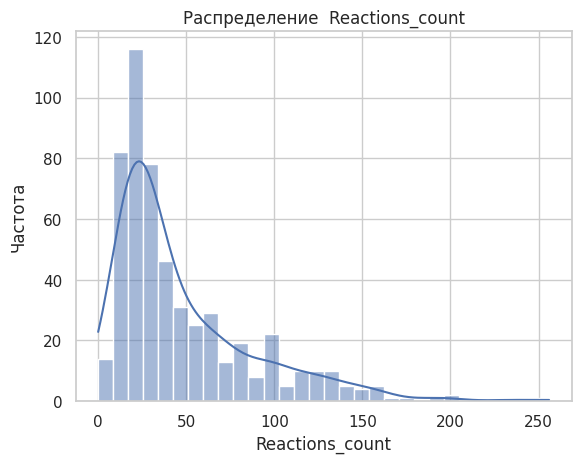

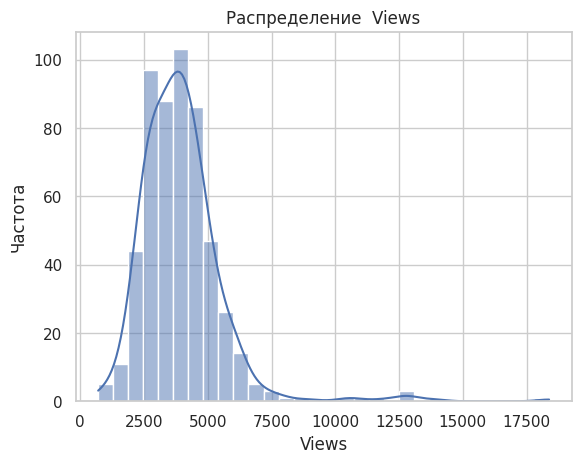

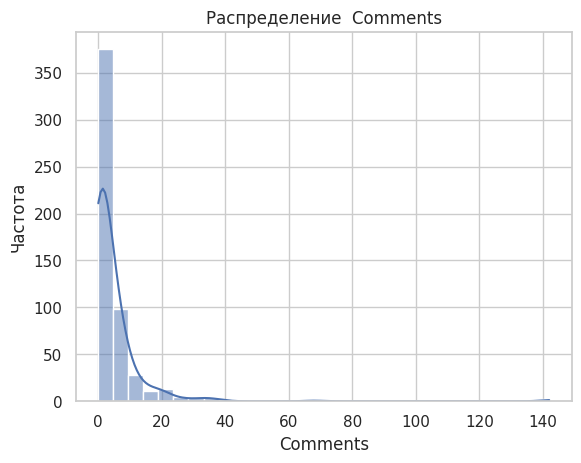

In [ ]:
# Устанавливаем стиль seaborn для более красивого отображения графиков
sns.set(style="whitegrid")

# Список столбцов, которые вы хотите визуализировать
columns_to_hist = ['reactions_count', 'views', 'comments']

# Перебираем столбцы и строим гистограммы
for column in columns_to_hist:
    # Используем метод distplot для построения гистограммы с ядерной оценкой плотности
    sns.histplot(df[column], bins=30, kde=True)

    # Настраиваем оси и заголовок графика
    plt.xlabel(column.capitalize())
    plt.ylabel('Частота')
    plt.title(f'Распределение  {column.capitalize()}')

    # Показываем график
    plt.show()

Дополнительно построим boxplot для оценки выбросов

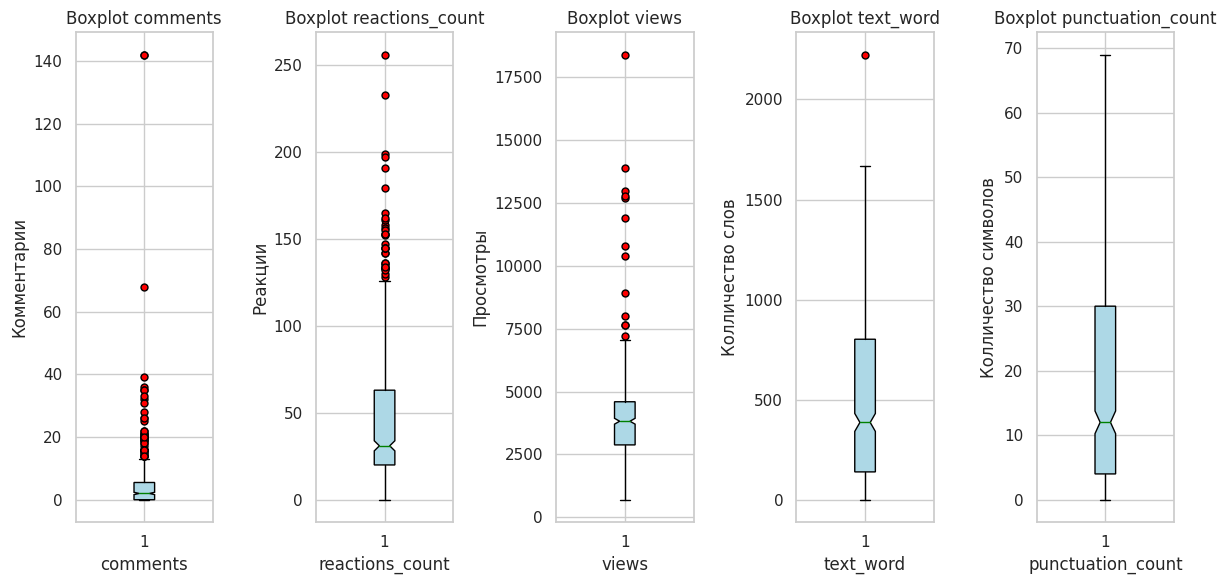

In [ ]:
# Задаем параметры графикам
def boxplot_charts(df, column, ax, ylabel):
    ax.boxplot(df[column], notch=True,
               patch_artist=True,
               boxprops=dict(facecolor='lightblue'),
               flierprops=dict(marker='o',
                               markersize=5,
                               markerfacecolor='red'),
               whiskerprops=dict(color='black'),
               medianprops=dict(color='green'))
    ax.set_xlabel(f'{column}')
    ax.set_ylabel(ylabel)
    ax.set_title(f'Boxplot {column}')

# Создаем общую фигуру и три подграфика (1 строка, 4 столбца)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 6), sharey=False)  # Устанавливаем sharey=False

# Добавляем параметр x_label для указания разной размерности оси x
boxplot_charts(df, 'comments', axes[0], 'Комментарии')
boxplot_charts(df, 'reactions_count', axes[1], 'Реакции')
boxplot_charts(df, 'views', axes[2], 'Просмотры')
boxplot_charts(df, 'text_word', axes[3], 'Колличество слов')
boxplot_charts(df, 'punctuation_count', axes[4], 'Колличество символов')

# Регулируем расположение подграфиков, чтобы они были близко друг к другу
plt.tight_layout()

# Отображение графиков
plt.show()

Из графиков видно наличие выбросов по всем показателям:
- views > 10 000
- comments > 100
- reactions_count > 160
- text_word > 2000

Посмотрим выбросы:

In [ ]:
# выбросы по эмодзи
df[df['reactions_count']>160][['date','text', 'views','reactions_count', 'comments']]

,date,text,views,reactions_count,comments
11,2023-11-24 12:02:12,"Семь фотографий — семь лет, как Руслан Ринатов...",3533,199,6
16,2023-11-21 15:27:12,Красивый заснеженный Иннополис глазами нашего ...,5011,256,20
36,2023-10-25 09:05:19,**В Иннополисе беспилотный автомобиль Яндекса ...,12690,197,18
59,2023-10-05 13:51:46,Объявляем день крутых новостей от наших препод...,4223,161,0
84,2023-09-07 14:49:02,Твой обычный вид из окна в Иннополисе\n\nФото:...,4836,179,5
142,2023-06-30 13:10:43,Иннополис в деталях 💟\n\nКусочки футуристическ...,4526,191,12
198,2023-04-20 11:35:49,"Вот что бывает, когда пешком до школы идти 10 ...",5820,233,9
269,2023-01-23 15:30:52,Сегодняшний закат глазами наших жителей 😍,4094,165,21
325,2022-11-24 13:14:54,Frozen,3163,162,14


In [ ]:
# выбросы по просмотрам
df[df['views']>10000][['date','text', 'views','reactions_count', 'comments']]

,date,text,views,reactions_count,comments
36,2023-10-25 09:05:19,**В Иннополисе беспилотный автомобиль Яндекса ...,12690,197,18
161,2023-06-07 13:17:56,Долгожданный формат уютного дня города вернулс...,12953,94,39
175,2023-05-25 11:45:01,"Динь-динь!\nЭто напоминание, что до Дня рожден...",10783,128,31
273,2023-01-16 13:33:54,"Иннополис – город, который ведет дневник счаст...",10396,92,6
301,2022-12-10 07:02:21,[Университету Иннополис](https://t.me/universi...,18380,112,10
351,2022-11-02 13:50:19,В новом сезоне откроется история великого Дома...,12769,101,8
465,2022-06-09 06:02:09,"Доброе утро, любимый город!\n\nСегодня у нас с...",13869,67,7
487,2022-05-24 13:28:38,Первый юбилей Иннополиса\n\n9 июня будет 10 ле...,11875,72,16


In [ ]:
# выброса по комментариям
df[df['comments']>100][['date','text', 'views','reactions_count', 'comments']]

,date,text,views,reactions_count,comments
170,2023-05-29 14:46:11,О классной фиче [нашего сайта](https://innopol...,4716,65,142
463,2022-06-09 12:01:39,"Сохраняй эти карточки о сегодняшнем празднике,...",4273,40,142


In [ ]:
# нулевые комментарии
df[df['comments']==0][['date','text', 'views','reactions_count', 'comments']]

,date,text,views,reactions_count,comments
3,2023-12-04 09:31:49,1. Университет Иннополис [открыл штаб-квартиру...,2391,38,0
9,2023-11-27 14:26:45,Чем займемся в Иннополисе на этой неделе? Обсу...,3018,31,0
14,2023-11-23 11:58:22,Ученые Университета Иннополис и МФТИ выиграли ...,4692,77,0
17,2023-11-20 14:25:01,Наши планы на эту неделю в Иннополисе: поиграт...,3534,26,0
20,2023-11-17 14:15:01,Внезапно в словарь «айтишный для начинающих» в...,3838,66,0
...,...,...,...,...,...
534,2022-03-02 12:18:58,UPD: вышел [Указ Президента\n\n](http://public...,1366,14,0
535,2022-03-01 13:20:00,@mintsifry разработало меры для поддержки IT-с...,1244,10,0
536,2022-03-01 13:12:39,Собрали все наши соцсети в одном месте. Присое...,938,11,0
537,2022-03-01 13:12:20,"Пост-напоминание, что Иннополис — место не тол...",788,7,0


In [ ]:
# выброса по количеству слов в постах
df[df['text_word']>2000][['date','text', 'views','reactions_count', 'comments']]

,date,text,views,reactions_count,comments
454,2022-06-20 08:04:31,1. Музыкантка [превратила](https://www.youtube...,2817,11,3


Как видно из текстов это посты про какие-то действительно значимые для жителей города события. В дальнейшем при расчете средних величин что бы более актуально отражать метрики будем эти посты исключать из аналитики.

## 2. EDA

### 2.1. Определение метрик эффективности

**В рамках данного исследования и с учетом предоставленных данных были выбраны следующие метрики эффективности постов:**
1. **Вовлеченность на пост (ER) по просмотрам, которая расчитывается по формуле (реакции на пост ÷ просмотры на пост) х 100 %**
Данная метрика является основной так как она позволит сравнивать посты между собой и выявить те, которые находят наибольший отклик у аудитории канала. Так как при отсутствии у пользователя платной телеграм подписки (по данным на 2023 пользователей с платной подпиской менее 1%) одна реакция = один пользователь, данная метрика позволит нам понять у какого процента открывших пост возникло желание его прочитать и далее отреагировать с помощью эмодзи.
В реакции можно было бы суммировать и комментарии, так как они часто тоже состоят из эмодзи или из эмодзи выраженного словами, но из тех данных которые есть сейчас мы не можем посмотреть количество уникальных пользователей, которые прокомментировали пост. И не можем исключить длинные цепочки комментариев под постом, где участвуют только несколько пользователей.

2. **Количество просмотров на пост**
Метрика тоже важная, так как есть темы которые не вызывают эмоционального отклика, но судя про просмотрам достаточно важны для аудитории канала. Например публикации по вакансиям.

Также считаем важными следующие метрики:

3. **Количество постов в месяц/неделю**
Ритмичность в публикациях постов тоже является важным фактором.

4. **Количество комментариев про переезд, работу, получение образования в Иннаполисе**
Так как задача стоит в развити города, росте количества его жителей то необходимо на постоянной основе мониторить какие именно посты приводят к таким комментариям, чтобы в дальнейшем публиковать больше контента схожей тематики

5. **NPS по эмодзи**
Метрика которая расчитывается по формуле: ((количество положительных эмодзи на пост - количество отрицательных эмодзи на пост) ÷ количество всех эмодзи на пост) х 100 %
Эта метрика поможет определить посты, которые выбиваются в сторону бОльшего количества отрицательных эмодзи. Контролировать в дальнейшем такой контент.

In [ ]:
# добавим колонку с расчетом ER
df['er'] = df['reactions_count']/df['views']*100


### 2.2. Определение тем постов


Задача сгруппировать посты по основным 10-15 темам для дальнейшего анализа. Задача решена с помощью визуального знакомства с тематикой постов в телеграм-канале, а также с привлечением чата gpt.

**Итого предлагаем следующие темы:**
- education: посты про Университет Иннаполис
- vacancy: посты про вакансии в Иннаполисе, регулярная рубрика
- tourism: тема про туризм в Иннаполисе (новая тема для канала, посты про туризм стали публиковаться совсем недавно)
- events: посты про проводимые в городе мероприятия, за исключением городских как то празднование дня города, нового года.
- weekly_plans: регулярно публикующаяся информация с планами на неделю
- city_events: посты про праздничные мероприятия в городе
- it_for_beginners: регулярная рубрика айтишный для начинающего
- fun_content: развлекательный контент на канале, обои, заставки, плейлисты...
- city_content: посты про город, жизнь в городе
- business: посты бизнес тематики
- it_news: регулярная рубрика с новостями ИТ инноновости

Реализация через регулярные выражения. Экспертная оценка точности реализации ~ 95%, так как не всегда можно однозначно выделить тему.

In [ ]:
# приведем в нижний регистр
df['text'] = df['text'].str.lower()

In [ ]:
# реализация через словарь с регулярными выражениями
topics_dict = {
    'education' : r'университет..иннополис|университет.иннополис|студент|учител',
    'vacancy': r'ваканси|офер|vacancy',
    'tourism': r'турист|туризм',
    'events': r'конкурс|турнир|конференц|форум|митап|команд|meetup',
    'weekly_plans': r'недел',
    'city_events': r'праздн|день.город|дед.мороз|дед[уа]',
    'it_for_beginners': r'айтишный|айтишного',
    'fun_content': r'обо[ия]|плейлист|заставк',
    'city_content': r'мэр|город',
    'business': r'производств|стартап'

}
# в цикле создим столбцы по темам с True|False
for topic in topics_dict.keys():
  df[topic] = df['text'].str.contains(topics_dict[topic])

In [ ]:
# функция для определения темы it_news, в силу синтаксиса рег.выражений искать "5." не получится
def it_news(text):
  if text.find('5.')> -1 or text.find('9.') > -1:
      return True
  else:
     return False

In [ ]:
# столбец с it_news
df['it_news'] = df['text'].apply(it_news)

In [ ]:
# функция с помощью которой 11 столбцов с True|False по вхождению поста в тему собираем в один с названием темы
def topic(row):
    education = row['education']
    vacancy = row['vacancy']
    tourism = row['tourism']
    events = row['events']
    weekly_plans = row['weekly_plans']
    city_events = row['city_events']
    it_for_beginners = row['it_for_beginners']
    fun_content = row ['fun_content']
    city_content = row['city_content']
    business = row['business']
    it_news = row['it_news']

    if it_news : return 'it_news'
    if vacancy : return 'vacancy'
    if tourism : return 'tourism'
    if education: return 'education'
    if events : return 'events'
    if it_for_beginners : return 'it_for_beginners'
    if fun_content : return 'fun_content'
    if city_events : return 'city_events'
    if weekly_plans : return 'weekly_plans'
    if business : return 'business'

    return 'city_content'

In [ ]:
# применяем функцию topic к датафрейму
df['topic'] = df.apply(topic, axis=1)

In [ ]:
# cгруппируем посты по темам и посмотрим метрики эффективности
group_posts = df.query('views < 10000 and comments < 100 and reactions_count < 160 and text_word < 2000').groupby('topic').agg(
    count_of_posts=('id','count'),
    views_mean =('views','mean'),
    reactions_mean=('reactions_count','mean'),
    comments_mean =('comments','mean'),
    er_mean=('er','mean'))
group_posts = group_posts.sort_values(by ='count_of_posts', ascending= False )

list_of_columns = ['views_mean', 'reactions_mean', 'comments_mean']
for column_name in list_of_columns:
  group_posts[column_name] = group_posts[column_name].round(1)
group_posts['er_mean'] = group_posts['er_mean'].round(2)

In [ ]:
# выведем таблицу
display(group_posts)

,count_of_posts,views_mean,reactions_mean,comments_mean,er_mean
topic,,,,,
city_content,168,3590.9,57.4,5.4,1.60
it_news,89,3556.2,21.3,1.7,0.60
events,61,4165.1,33.2,1.9,0.88
education,58,3607.3,59.0,3.1,1.64
vacancy,38,4413.5,23.0,3.6,0.54
it_for_beginners,33,4058.8,46.5,2.9,1.17
fun_content,19,4268.5,48.4,12.5,1.15
business,18,3339.4,43.4,1.6,1.29
city_events,16,4307.7,75.4,5.8,1.78


In [ ]:
# посмотрим темы постов которые являются выбросами в большую сторону по просмотрам, реакциям, комментариям
df.query('views >= 10000 or comments >= 100\
             or reactions_count >= 160 ')['topic'].value_counts()

city_content    9
city_events     4
education       3
tourism         1
events          1
Name: topic, dtype: int64

Как видно 13 из 18 самых популярных постов  про город и городские события

### 2.3. Определение наиболее и наименее популярных тем

In [ ]:
# сохраним таблицу из предыдущего раздела в отдельной переменной и округлим значения
posts_by_topic = df.query('views < 10000 and comments < 100 and reactions_count < 160 ').groupby('topic').agg(
    count_of_posts=('id','count'), views_mean =('views','mean'), reactions_mean=('reactions_count','mean'), comments_mean =('comments','mean'), er_mean=('er','mean')).reset_index()

list_of_columns = ['views_mean', 'reactions_mean', 'comments_mean']
for column_name in list_of_columns:
  posts_by_topic[column_name] = posts_by_topic[column_name].round(0)
posts_by_topic['er_mean'] = posts_by_topic['er_mean'].round(2)

In [ ]:
# выведем таблицу
display(posts_by_topic)

,topic,count_of_posts,views_mean,reactions_mean,comments_mean,er_mean
0,business,18,3339.0,43.0,2.0,1.29
1,city_content,168,3591.0,57.0,5.0,1.60
2,city_events,16,4308.0,75.0,6.0,1.78
3,education,58,3607.0,59.0,3.0,1.64
4,events,61,4165.0,33.0,2.0,0.88
5,fun_content,19,4269.0,48.0,12.0,1.15
6,it_for_beginners,33,4059.0,46.0,3.0,1.17
7,it_news,90,3548.0,21.0,2.0,0.60
8,tourism,6,4558.0,41.0,3.0,0.98
9,vacancy,38,4414.0,23.0,4.0,0.54


In [ ]:
# выведем метрики эффективности для определения наиболее и наименее популярных тем
posts_by_topic[['topic','er_mean']].sort_values(by='er_mean', ascending=False)

,topic,er_mean
2,city_events,1.78
3,education,1.64
1,city_content,1.60
0,business,1.29
6,it_for_beginners,1.17
5,fun_content,1.15
8,tourism,0.98
4,events,0.88
10,weekly_plans,0.83
7,it_news,0.60


In [ ]:
# выведем метрики эффективности для определения наиболее и наименее популярных тем
posts_by_topic[['topic','views_mean']].sort_values(by='views_mean', ascending=False)

,topic,views_mean
8,tourism,4558.0
9,vacancy,4414.0
2,city_events,4308.0
5,fun_content,4269.0
4,events,4165.0
10,weekly_plans,4085.0
6,it_for_beginners,4059.0
3,education,3607.0
1,city_content,3591.0
7,it_news,3548.0


**Наиболее популярные темы ТОП-3**

**По вовлеченности на пост:**
- city_events
- education
- city_content

**По среднему количеству просмотров:**
- tourism (новая тема, мало постов и оценка может быть не совсем точна)
- vacancy
- city_events



**Наименее популярные темы ТОП-3**

**По вовлеченности на пост:**
- weekly_plans
- it_news
- vacancy

**По среднему количеству просмотров:**
- city_content
- it_news
- business

**Также нельзя не отметить fun_content как наиболее комментируемую тему**

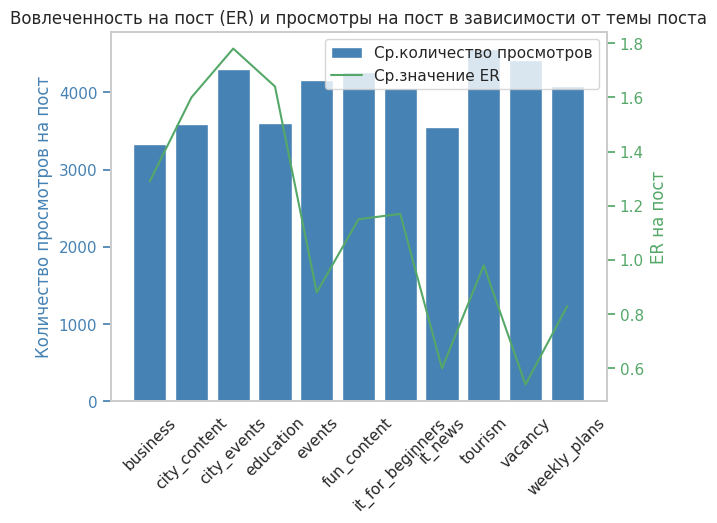

In [ ]:
#  строим график
x_values = posts_by_topic['topic']

# Данные для первого набора значений по первой оси y
y1_values = posts_by_topic['views_mean']

# Данные для второго набора значений по второй оси y
y2_values = posts_by_topic['er_mean']

fig, ax1 = plt.subplots()

# Построение первого графика
ax1.bar(x_values, y1_values, color='steelblue', label='Cр.количество просмотров')  # График 1 на оси y1 (левая ось)
#ax1.set_xlabel('Значения по оси X')
ax1.set_ylabel('Количество просмотров на пост', color='steelblue')
ax1.tick_params('y', colors='steelblue')

plt.xticks(rotation=45)
# Создание второй оси y (правая ось)
ax2 = ax1.twinx()
ax2.plot(x_values, y2_values,'g-', label='Ср.значение ER')  # График 2 на оси y2 (правая ось)
ax2.set_ylabel('ER на пост', color='g')
ax2.tick_params('y', colors='g')
# Убрать сетку
ax1.grid(False)
ax2.grid(False)

# Добавление легенды
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels, loc='best')

plt.title('Вовлеченность на пост (ER) и просмотры на пост в зависимости от темы поста')

plt.show()

In [ ]:
fig = px.treemap(posts_by_topic, path=[px.Constant('topic'), 'topic'],
              values=posts_by_topic['count_of_posts'],
              color=posts_by_topic['count_of_posts'],
                 color_continuous_scale='YlGnBu',
                 color_continuous_midpoint=np.average(posts_by_topic['count_of_posts']), width=800, height=400, title='Количество постов различных тематик с марта 2022 по декабрь 2023'
              )
fig.update_layout(margin = dict(t=50, l=25,r=25, b=25))
fig.show()

### 2.4. Определение типов постов

In [ ]:
# выведем данные по столбцу с типом вложения
df['type_attachment'].unique()

array(['MessageMediaPhoto', 'MessageMediaDocument', '',
       'MessageMediaWebPage'], dtype=object)

In [ ]:
# функция для распределения постов по типам: текст, с фото, с видео, с ссылкой
def type(row):

  if row['type_attachment'] == 'MessageMediaPhoto' and row['topic'] not in ['it_news', 'vacancy']: return 'with photo'
  if row['type_attachment']  == 'MessageMediaDocument': return 'with video'
  if row['type_attachment']  == 'MessageMediaWebPage': return 'with link'
  return 'text'

In [ ]:
# применим функцию к таблице
df['type'] = df.apply(type, axis=1)

In [ ]:
#  добавила sort_values & reset_index для графиков и сохранила в отдельной переменной
# cгруппируем посты по типам и посмотрим метрики эффективности
posts_by_type = df.query('views < 10000 and comments < 100 and reactions_count < 160 ').groupby('type').agg(
    count_of_posts=('id','count'), views_mean =('views','mean'), reactions_mean=('reactions_count','mean'), comments_mean =('comments','mean'), er_mean=('er','mean')
    ).sort_values(by='views_mean', ascending=False).reset_index()
posts_by_type

,type,count_of_posts,views_mean,reactions_mean,comments_mean,er_mean
0,with link,8,4064.000000,37.125000,7.250000,0.903765
1,with video,45,3945.800000,70.466667,6.733333,1.848888
2,with photo,303,3899.666667,52.650165,4.356436,1.405780
3,text,165,3579.066667,21.854545,1.963636,0.630474


In [ ]:
display(posts_by_type)

,type,count_of_posts,views_mean,reactions_mean,comments_mean,er_mean
0,with link,8,4064.000000,37.125000,7.250000,0.903765
1,with video,45,3945.800000,70.466667,6.733333,1.848888
2,with photo,303,3899.666667,52.650165,4.356436,1.405780
3,text,165,3579.066667,21.854545,1.963636,0.630474


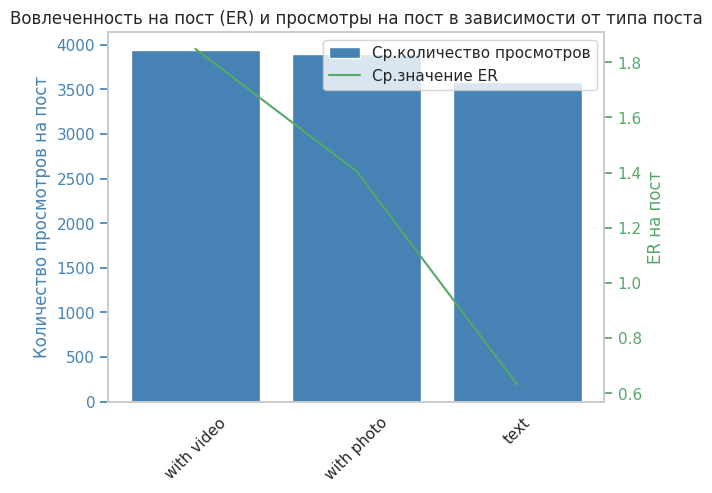

In [ ]:
#  строим график
x_values = posts_by_type.query('type != "with link"')['type']

# Данные для первого набора значений по первой оси y
y1_values = posts_by_type.query('type != "with link"')['views_mean']

# Данные для второго набора значений по второй оси y
y2_values = posts_by_type.query('type != "with link"')['er_mean']

fig, ax1 = plt.subplots()

# Построение первого графика
ax1.bar(x_values, y1_values, color='steelblue', label='Cр.количество просмотров')  # График 1 на оси y1 (левая ось)
#ax1.set_xlabel('Значения по оси X')
ax1.set_ylabel('Количество просмотров на пост', color='steelblue')
ax1.tick_params('y', colors='steelblue')

plt.xticks(rotation=45)
# Создание второй оси y (правая ось)
ax2 = ax1.twinx()
ax2.plot(x_values, y2_values,'g-', label='Ср.значение ER')  # График 2 на оси y2 (правая ось)
ax2.set_ylabel('ER на пост', color='g')
ax2.tick_params('y', colors='g')
# Убрать сетку
ax1.grid(False)
ax2.grid(False)
# Добавление легенды
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels, loc='best')

plt.title('Вовлеченность на пост (ER) и просмотры на пост в зависимости от типа поста')

plt.show()

К текстовым постам без изображения также были отнесены темы vacancy, it_news так как там изображение является по факту заголовком поста и не меняется от публикации к публикации.

Тут и далее значения эффективности при количестве постов <10 не рассматриваем, так как слишком мало значений для расчета метрик.

**Как видим из таблицы по вовлеченности и по среднему количеству просмотров наименьшей популярностью пользуются просто текстовые посты, далее идут с фото и наиболее популярны с видео.**

### 2.5. Определение лучшего времени для публикации

In [ ]:
# создадим столбцы с часом и днем недели публикации поста
df['hours'] = df['date'].dt.hour
df['week_days'] = df['date'].dt.weekday

In [ ]:
# cгруппируем посты по часам публикации и посмотрим метрики эффективности
time_group = df.query('views < 10000 and comments < 100 and reactions_count < 160 and text_word < 2000').groupby('hours').agg(
    count_of_posts=('id','count'), views_mean =('views','mean'), reactions_mean=('reactions_count','mean'), comments_mean =('comments','mean'), er_mean=('er','mean'))


In [ ]:
display(time_group)

,count_of_posts,views_mean,reactions_mean,comments_mean,er_mean
hours,,,,,
4,2,4041.500000,124.000000,7.000000,3.115255
5,3,4551.666667,98.333333,4.333333,2.047057
6,5,3429.600000,82.800000,4.400000,2.350862
7,27,3821.370370,42.962963,2.481481,1.146227
8,47,3765.191489,41.085106,3.212766,1.138600
9,81,3847.617284,35.740741,2.962963,0.924416
10,36,3991.527778,48.833333,3.611111,1.258670
11,29,3671.965517,57.172414,5.862069,1.532038
12,59,4033.508475,39.372881,4.322034,1.040725


Максимальные и минимальные значения вовлеченности в 9, 11 и 16 часов, посмотрим на темы в это время

In [ ]:
df.query('views < 10000 and comments < 100 and\
          reactions_count < 160 and hours == 9 ')['topic'].value_counts()

it_news             37
city_content        12
education           11
events               5
vacancy              5
it_for_beginners     3
business             3
fun_content          2
weekly_plans         1
tourism              1
city_events          1
Name: topic, dtype: int64

In [ ]:
df.query('views < 10000 and comments < 100 and\
             reactions_count < 160 and hours == 11 ')['topic'].value_counts()

city_content        13
it_news              6
education            5
weekly_plans         1
events               1
fun_content          1
it_for_beginners     1
business             1
Name: topic, dtype: int64

In [ ]:
df.query('views < 10000 and comments < 100 and\
          reactions_count < 160 and hours == 16 ')['topic'].value_counts()

city_content        4
it_for_beginners    2
events              2
tourism             1
education           1
it_news             1
Name: topic, dtype: int64

**Из приведенных выше данных видно, что нельзя выделить какое-то лучшее врем для публикации поста. Больше влияния на метрики оказывает тема поста. Как в примере с 9 часами где проседает вовлеченность до 0,92 и именно это время типично для публикации рубрики it_news c достаточно низким показателем вовлеченности**

In [ ]:
# cгруппируем посты по часам публикации и посмотрим метрики эффективности
df.query('views < 10000 and comments < 100 and reactions_count < 160 and text_word < 2000 ').groupby('week_days').agg(
    count_of_posts=('id','count'), views_mean =('views','mean'), reactions_mean=('reactions_count','mean'), comments_mean =('comments','mean'), er_mean=('er','mean'))


,count_of_posts,views_mean,reactions_mean,comments_mean,er_mean
week_days,,,,,
0,119,3601.689076,29.647059,2.184874,0.834478
1,102,3457.754902,48.892157,5.166667,1.422156
2,88,3747.556818,45.818182,4.579545,1.316764
3,84,4059.511905,45.571429,4.107143,1.177647
4,101,4128.643564,52.178218,3.683168,1.268297
5,20,4404.600000,49.700000,2.950000,1.158045
6,6,3706.666667,62.833333,6.000000,1.599985


Максимальные и минимальные значения вовлеченности в понедельник и вторник, по просмотрам максимум в субботу посмотрим на темы в это время

In [ ]:
df.query('views < 10000 and comments < 100 and\
         reactions_count < 160 and text_word < 2000 and week_days == 0 ')['topic'].value_counts()

it_news         80
city_content    14
weekly_plans     8
events           7
education        5
business         2
city_events      2
tourism          1
Name: topic, dtype: int64

In [ ]:
df.query('views < 10000 and comments < 100 and\
             reactions_count < 160 and text_word < 2000 and week_days == 1 ')['topic'].value_counts()

city_content        43
events              16
education           11
fun_content         10
it_news              5
vacancy              4
city_events          4
business             4
weekly_plans         2
it_for_beginners     2
tourism              1
Name: topic, dtype: int64

In [ ]:
df.query('views < 10000 and comments < 100 and\
             reactions_count < 160 and text_word < 2000 and week_days == 5 ')['topic'].value_counts()

city_content        12
education            3
business             2
events               1
weekly_plans         1
it_for_beginners     1
Name: topic, dtype: int64

Ситуация аналогичная со времением публикации, важнее тема, а не время публикации.

### 2.6. Зависимость ER от длинны поста

Создадим датафрейм отсортированный по выбросам.

In [ ]:
df_emissions = df.query('views < 10000 and comments < 100 and\
             reactions_count < 160 and text_word < 2000')

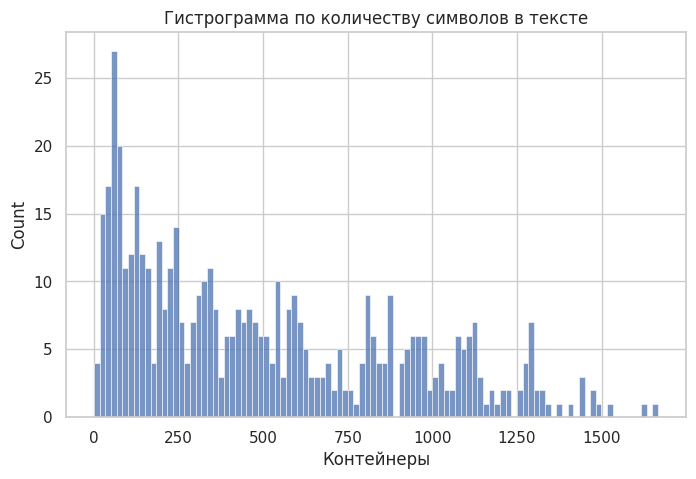

In [ ]:
# строим график
plt.figure(figsize=(8, 5))
sns.histplot(x='text_word', data=df_emissions,bins = 100)
plt.title('Гистрограмма по количеству символов в тексте')
plt.xlabel('Контейнеры')

plt.show()

По построенному графику выберем интервалы на которые разобьем количество символов. По этим классам оценим вовлеченность на пост по просмотрам.

In [ ]:
# Функция классификации
def text_classification(value):
  if value <= 500:
      return 'low_text'
  if 500 < value <= 1000:
      return 'mid_text'
  if 1000 < value <= 1500:
      return 'high_text'
  if value > 1500:
      return 'huge_text'

# Добовляем критерий
df_emissions['text_classification'] = df_emissions['text_word'].apply(text_classification)


<ipython-input-68-fc9aeaced7d2>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



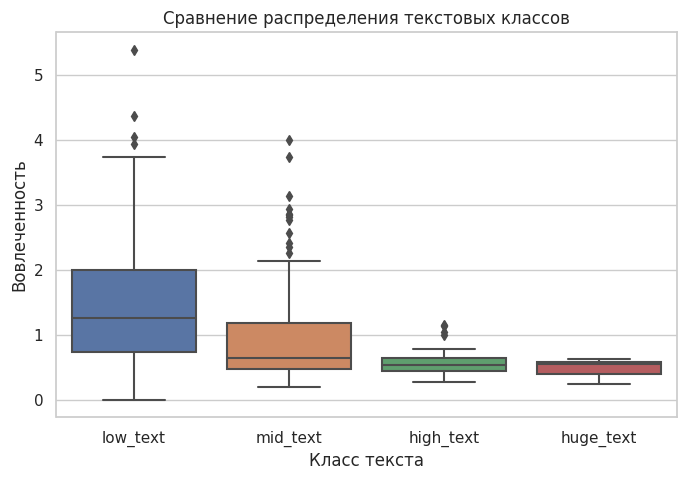

In [ ]:
# Создание boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='text_classification', y='er', data=df_emissions, order=['low_text', 'mid_text', 'high_text', 'huge_text'])
plt.title('Сравнение распределения текстовых классов')
plt.xlabel('Класс текста')
plt.ylabel('Вовлеченность')
plt.show()

Можно заметить, что существует взаимосвязь между уровнем вовлеченности (ER) и длиной поста.

Давайте дополнительно проанализируем ещё одну метрику: количество реакций на пост.

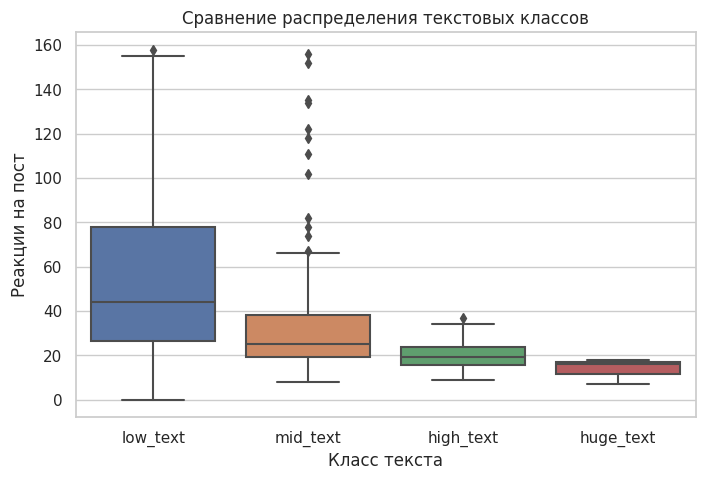

In [ ]:
# Создание boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='text_classification', y='reactions_count', data=df_emissions, order=['low_text', 'mid_text', 'high_text', 'huge_text'])
plt.title('Сравнение распределения текстовых классов')
plt.xlabel('Класс текста')
plt.ylabel('Реакции на пост')
plt.show()

Также можно отметить, что пользователи более активно реагируют на короткие посты.

### 2.7. Зависимость метрики ER от количества знаков препинания поста

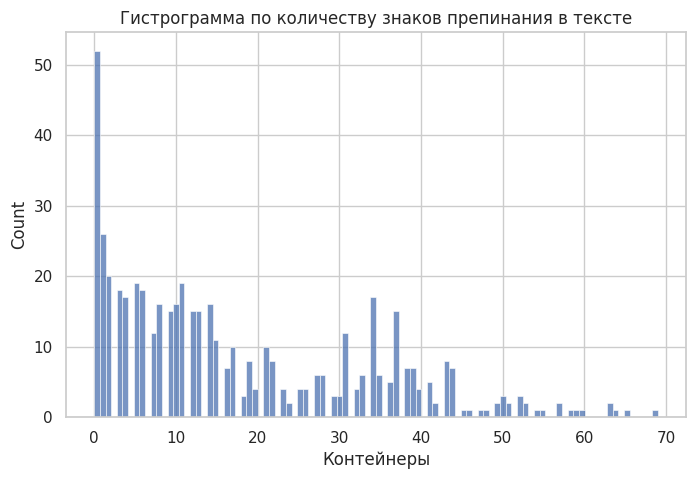

In [ ]:
# строим график
plt.figure(figsize=(8, 5))
sns.histplot(x='punctuation_count', data=df_emissions,bins = 100)
plt.title('Гистрограмма по количеству знаков препинания в тексте')
plt.xlabel('Контейнеры')

plt.show()

По построенному графику выберем интервалы на которые разобьем количество символов. По этим классам оценим вовлеченность на пост по просмотрам.

In [ ]:
# Функция классификации
def punctuation_classification(value):
  if value <= 15:
      return 'low_punctuation'
  if 15 < value <= 30:
      return 'mid_punctuation'
  if 30 < value <= 50:
      return 'high_punctuation'
  if value > 50:
      return 'huge_punctuation'

# Добовляем критерий
df_emissions['punctuation_classification'] = df_emissions['punctuation_count'].apply(punctuation_classification)


<ipython-input-72-c41e996103a6>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



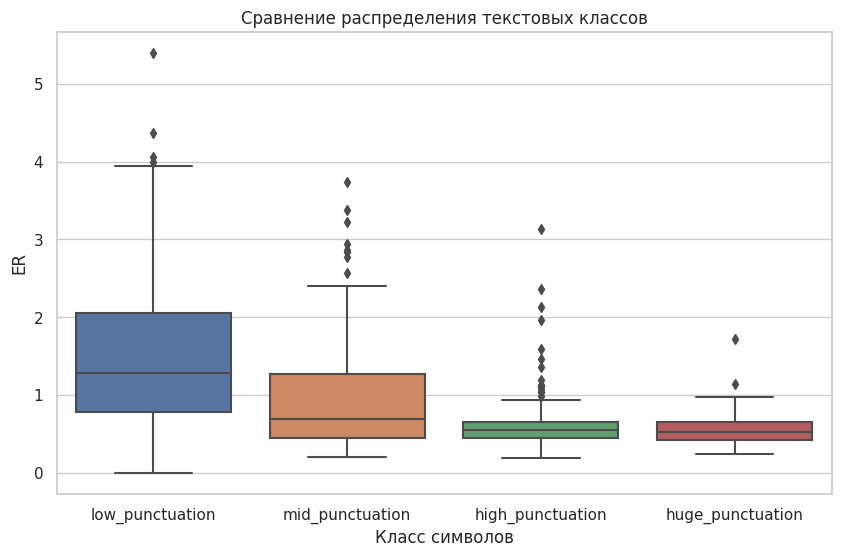

In [ ]:
# Создание диаграммы
plt.figure(figsize=(10, 6))
sns.boxplot(x='punctuation_classification', y='er', data=df_emissions, order=['low_punctuation', 'mid_punctuation', 'high_punctuation', 'huge_punctuation'])
plt.title('Сравнение распределения текстовых классов')
plt.xlabel('Класс символов')
plt.ylabel('ER')
plt.show()

Эта метрика подтверждает предыдущее наблюдение о том, что существует взаимосвязь между уровнем вовлеченности и длиной поста.

### 2.8. Зависимость ER от количества рекций

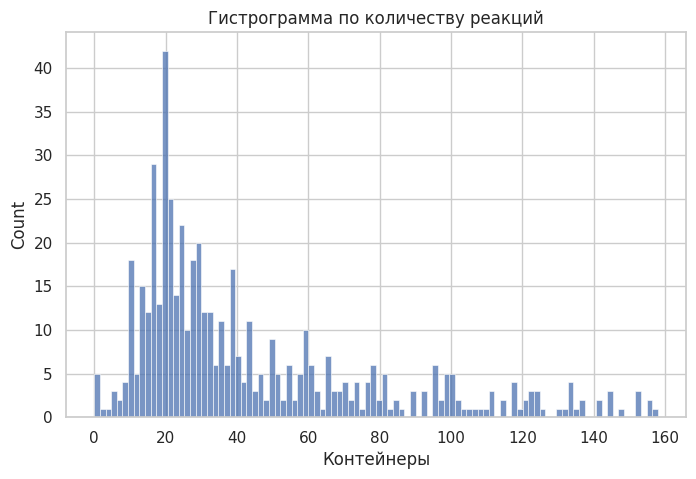

In [ ]:
# строим график
plt.figure(figsize=(8, 5))
sns.histplot(x='reactions_count', data=df_emissions,bins = 100)
plt.title('Гистрограмма по количеству реакций')
plt.xlabel('Контейнеры')

plt.show()

По построенному графику выберем интервалы на которые разобьем количество символов. По этим классам оценим вовлеченность на пост по просмотрам.

In [ ]:
# Функция классификации
def reactions_count_classification(value):
  if value <= 50:
      return 'low_reactions_count'
  if 50 < value <= 100:
      return 'mid_reactions_count'
  if 100 < value <= 150:
      return 'high_reactions_count'
  if value > 150:
      return 'huge_reactions_count'

# Добовляем критерий
df_emissions['reactions_count_classification'] = df_emissions['reactions_count'].apply(reactions_count_classification)


<ipython-input-75-46529c02e306>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



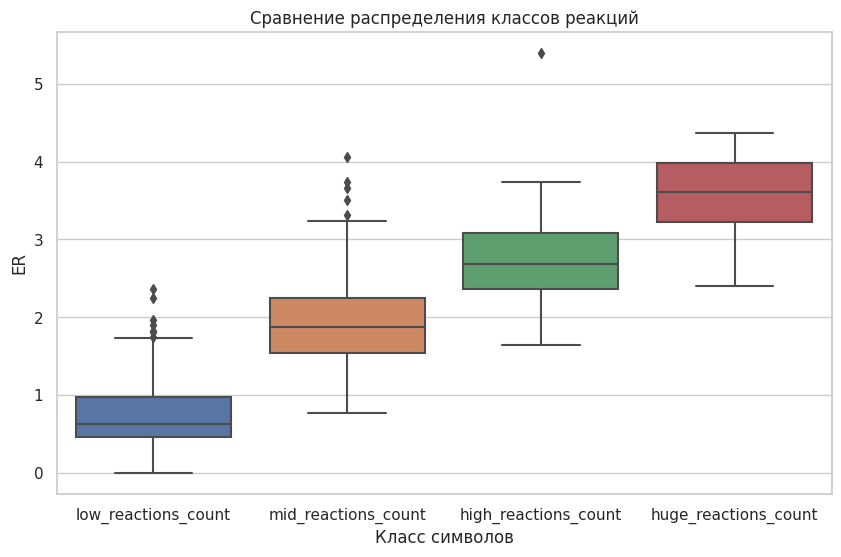

In [ ]:
# Создание  диаграммы
plt.figure(figsize=(10, 6))
sns.boxplot(x='reactions_count_classification', y='er', data=df_emissions, order=['low_reactions_count', 'mid_reactions_count',\
                                                                           'high_reactions_count', 'huge_reactions_count'])
plt.title('Сравнение распределения классов реакций')
plt.xlabel('Класс символов')
plt.ylabel('ER')
plt.show()

Мы видим на графике линейную зависимость между уровнем вовлеченности и количеством реакций.

### 2.9. Зависимость ER от количества комментариев

Удалим из анализа посты без комментариев

In [ ]:
df_emissions = df_emissions.query('comments!=0')

In [ ]:
# Функция классификации
def comments_classification(value):
  if value <= 5:
      return 'low_comments'
  if 5 < value <= 10:
      return 'mid_comments'
  if 10 < value <= 15:
      return 'high_comments'
  if value > 15:
      return 'huge_comments'

# Добовляем критерий
df_emissions['comments_classification'] = df_emissions['comments'].apply(comments_classification)

<ipython-input-78-374aa3de580c>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



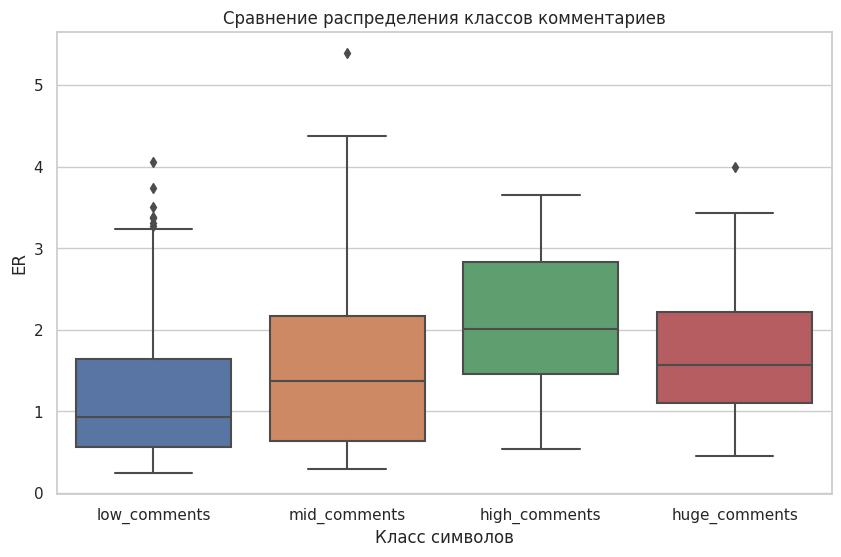

In [ ]:
# Создание  диаграммы
plt.figure(figsize=(10, 6))
sns.boxplot(x='comments_classification', y='er', data=df_emissions, order=['low_comments', 'mid_comments',\
                                                                           'high_comments', 'huge_comments'])
plt.title('Сравнение распределения классов комментариев')
plt.xlabel('Класс символов')
plt.ylabel('ER')
plt.show()

Посты, получившие от 10 до 15 комментариев, привлекают наибольшее внимание, выраженное в высокой вовлеченности. Возможно сказать, что эти посты считаются более популярными, учитывая их относительно высокий уровень комментариев. Снижение уровня вовлеченности для группы постов с более чем 15 комментариями может быть объяснено тем, что это посты, уже вызвавшие активные обсуждения. В таких случаях дополнительные комментарии могут оказывать менее заметное влияние на общую вовлеченность, что может быть обосновано тем, что обсуждение уже достаточно интенсивно.

### 2.10. Зависимость индекса ER от постов c эмодзи и без




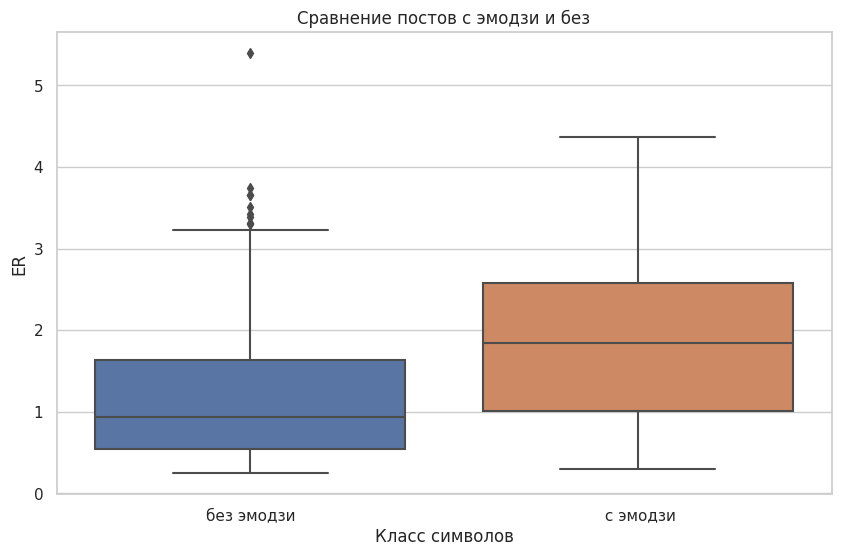

In [ ]:
# Создание диаграммы boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_emoji', y='er', data=df_emissions)

plt.xticks(ticks=[0, 1], labels=['без эмодзи', ' c эмодзи'])  # Добавление подписей для оси x
plt.title('Сравнение постов c эмодзи и без')
plt.xlabel('Класс символов')
plt.ylabel('ER')
plt.show()


Визуальное привлечение может стать фактором, обуславливающим большую привлекательность постов с эмодзи. Эмодзи могут эффективно выделиться на фоне текста, привнося визуальные элементы, которые привлекают внимание читателей. Это визуальное разнообразие может сделать контент более привлекательным и интересным для аудитории.

### 2.11. Облако слов

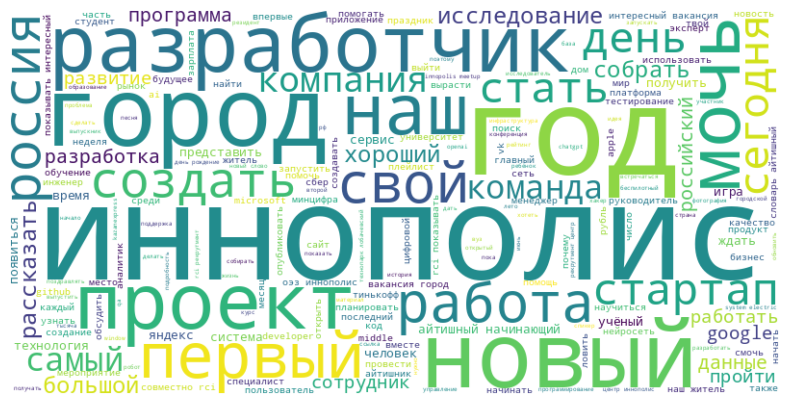

In [ ]:
# Создание и отображение облака слов
wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400
).generate(text_for_wordcloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Оценка тональности слов

In [ ]:
# Создаем объект TextBlob
blob = TextBlob(text_for_wordcloud)

# Получаем оценку тональности текста (в диапазоне от -1 до 1, где -1 - негативная, 1 - положительная)
sentiment_score = blob.sentiment.polarity

# Выводим результат
if sentiment_score > 0:
    print('Текст имеет положительную тональность.')
elif sentiment_score < 0:
    print('Текст имеет негативную тональность.')
else:
    print('Текст имеет нейтральную тональность.')

Текст имеет положительную тональность.


### 2.12. Определение срока жизни поста

In [ ]:
posts_with_comments = (df.merge(df_comments, left_on=['id'], right_on=['post_id'], how='right')
                       .sort_values(by=['id', 'date_comment'])
                       .groupby('id')
                       .agg({'date':'first',
                             'text': 'first',
                             'views':'first',
                             'reactions_count': 'first',
                             'comments': 'first',
                             'date_comment':'last'})
                      )


In [ ]:
# столбец разницы м/у временем публикации и последнего комментария
posts_with_comments['time_of_life'] = posts_with_comments['date_comment'] - posts_with_comments['date']


In [ ]:
# переведем timedelta в часы
posts_with_comments['time_of_life'] = posts_with_comments['time_of_life'].apply(lambda x: x.total_seconds()/(60*60))

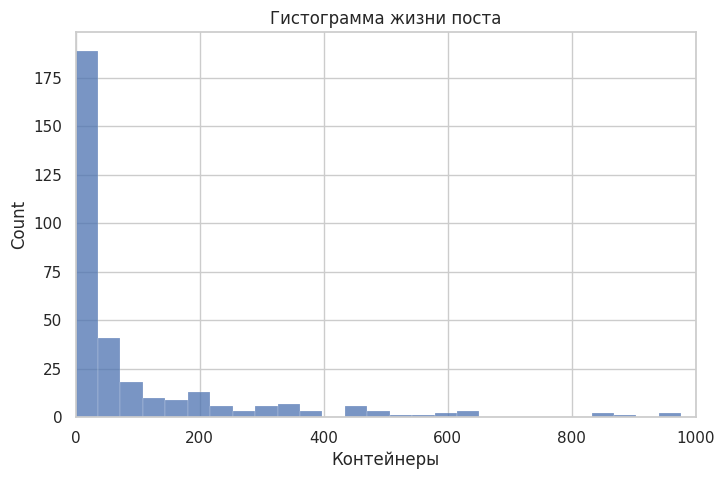

In [ ]:
# строим график
plt.figure(figsize=(8, 5))
sns.histplot(x='time_of_life', data=posts_with_comments, bins=300)
plt.title('Гистограмма жизни поста')
plt.xlabel('Контейнеры')
plt.xlim(0, 1000)  # Установите пределы оси x здесь

plt.show()


In [ ]:
# посмотрим стат.данные по столбцу без выбросов
posts_with_comments[posts_with_comments['time_of_life']<400]['time_of_life'].describe()

count    305.000000
mean      61.699393
std       90.725277
min        0.003611
25%        3.317500
50%       21.282222
75%       71.885278
max      389.989167
Name: time_of_life, dtype: float64

**Из полученных данных на основании времени коментирования можно предположить что среднее время жизни поста 2,5 дня. Но эта гипотеза требует подтверждения по данным времени просмотров и времени публикации реакций**

### 2.13. Основные данные по каналу сгруппированные по месяцам

Помимо задач сфорулированных в ТЗ интересно посмотреть динамику основных показателей и публикации тем по месяцам, чтобы понять чем живет телеграм канал

In [ ]:
# выделим из даты год-месяц
df['year_month'] = df['date'].dt.strftime("%Y-%m")

In [ ]:
# сгруппируем по месяцам
posts_by_month = df.query('views < 10000 and comments < 100 and reactions_count < 160 ').groupby('year_month').agg({
    'id':'count', 'views':['sum','mean'], 'reactions_count':'mean', 'comments':'mean', 'er':'mean'}).reset_index()

In [ ]:
# назовем колонки
posts_by_month.columns = ['year_month', 'count_of_posts', 'views_sum',\
                          'views_mean', 'reactions_mean', 'comments_mean', 'er_mean']

In [ ]:
# округлим значения
list_of_columns = ['views_sum', 'views_mean', 'reactions_mean', 'comments_mean']
for column_name in list_of_columns:
  posts_by_month[column_name] = posts_by_month[column_name].round(0)
posts_by_month['er_mean'] = posts_by_month['er_mean'].round(2)

In [ ]:
# выведем таблицу
display(posts_by_month)

,year_month,count_of_posts,views_sum,views_mean,reactions_mean,comments_mean,er_mean
0,2022-03,19,35945,1892.0,21.0,0.0,1.22
1,2022-04,18,43866,2437.0,24.0,2.0,1.05
2,2022-05,24,59586,2483.0,29.0,3.0,1.17
3,2022-06,32,99722,3116.0,31.0,6.0,1.03
4,2022-07,24,74006,3084.0,31.0,2.0,1.10
5,2022-08,22,75787,3445.0,43.0,3.0,1.27
6,2022-09,20,73549,3677.0,50.0,4.0,1.35
7,2022-10,24,91051,3794.0,39.0,4.0,1.16
8,2022-11,36,111987,3111.0,29.0,2.0,1.02
9,2022-12,33,123433,3740.0,39.0,4.0,1.11


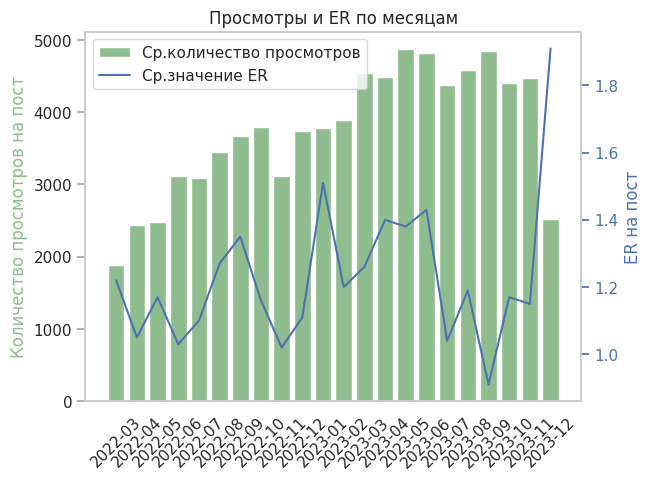

In [ ]:
# строим график
x_values = posts_by_month['year_month']

# Данные для первого набора значений по первой оси y
y1_values = posts_by_month['views_mean']

# Данные для второго набора значений по второй оси y
y2_values = posts_by_month['er_mean']

fig, ax1 = plt.subplots()

# Построение первого графика
ax1.bar(x_values, y1_values, color='darkseagreen', label='Cр.количество просмотров')  # График 1 на оси y1 (левая ось)
#ax1.set_xlabel('Значения по оси X')
ax1.set_ylabel('Количество просмотров на пост', color='darkseagreen')
ax1.tick_params('y', color='darkseagreen')

plt.xticks(rotation=45)
# Создание второй оси y (правая ось)
ax2 = ax1.twinx()
ax2.plot(x_values, y2_values, 'b-', label='Ср.значение ER')  # График 2 на оси y2 (правая ось)
ax2.set_ylabel('ER на пост', color='b')
ax2.tick_params('y', colors='b')
# Убрать сетку
ax1.grid(False)
ax2.grid(False)
# Добавление легенды
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels, loc='best')

plt.title('Просмотры и ER по месяцам')

plt.show()

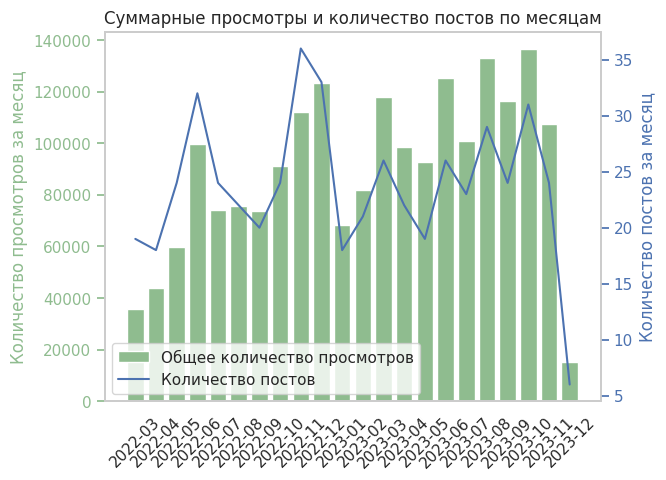

In [ ]:
# строим график
x_values = posts_by_month['year_month']

# Данные для первого набора значений по первой оси y
y1_values = posts_by_month['views_sum']

# Данные для второго набора значений по второй оси y
y2_values = posts_by_month['count_of_posts']

fig, ax1 = plt.subplots()

# Построение первого графика
ax1.bar(x_values, y1_values, color='darkseagreen', label='Общее количество просмотров')  # График 1 на оси y1 (левая ось)
#ax1.set_xlabel('Значения по оси X')
ax1.set_ylabel('Количество просмотров за месяц', color='darkseagreen')
ax1.tick_params('y', colors='darkseagreen')

plt.xticks(rotation=45)
# Создание второй оси y (правая ось)
ax2 = ax1.twinx()
ax2.plot(x_values, y2_values, 'b-', label='Количество постов')  # График 2 на оси y2 (правая ось)
ax2.set_ylabel('Количество постов за месяц', color='b')
ax2.tick_params('y', colors='b')
# Убрать сетку
ax1.grid(False)
ax2.grid(False)
# Добавление легенды
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels, loc='best')

plt.title('Суммарные просмотры и количество постов по месяцам')

plt.show()

In [ ]:
# посчитаем количество постов разных тем по месяцам
topic_by_month = df.pivot_table(index='year_month', columns='topic', values='id', aggfunc='count').fillna(0)


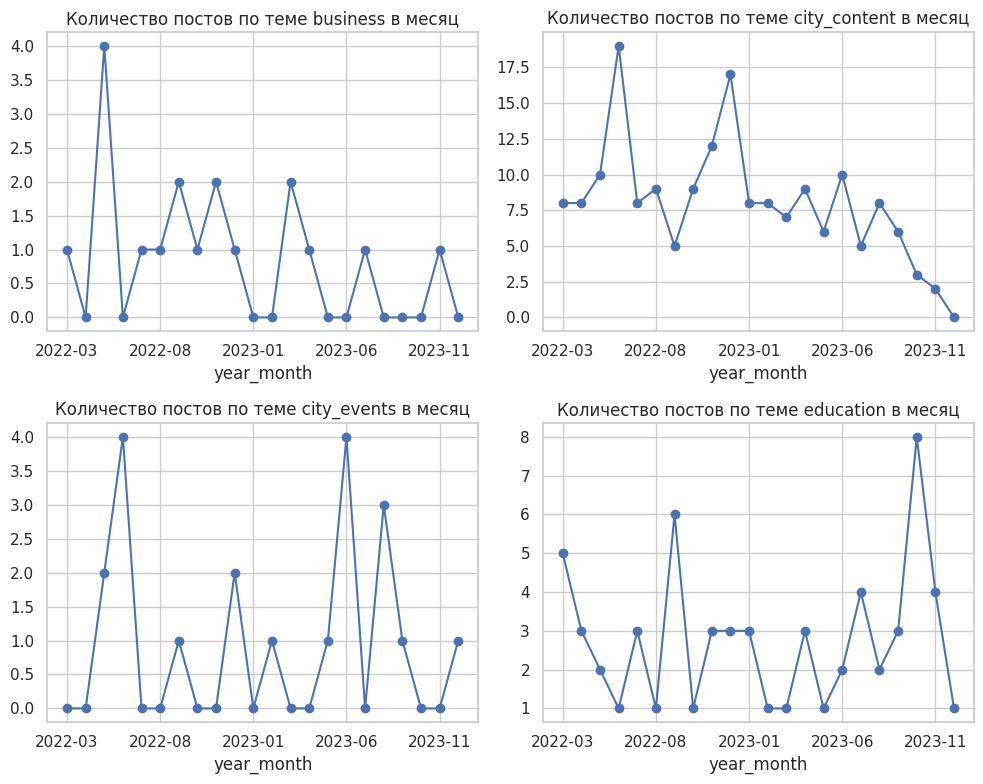

In [ ]:
# Определим количество строк и столбцов в вашей сетке графиков
num_rows = 2
num_cols = 2

# Создаем фигуру и оси для графиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Список с названиями столбцов для графиков
column_names = topic_by_month.columns

# Итерация по осям и названиям столбцов
for i in range(num_rows):
    for j in range(num_cols):
        # Выбор соответствующего столбца
        column_name = column_names[i * num_cols + j]

        # Постройка графика на текущих осях
        topic_by_month[column_name].plot(y=column_name, style='o-', grid=True, ax=axes[i, j],
                                         title=f'Количество постов по теме {column_name} в месяц')

# Регулировка макета графиков
plt.tight_layout()

# Показать графики
plt.show()

Как видно из представленных выше таблиц и графиков:
- есть тенденция к снижению вовлеченности на пост от месяца к месяцу
- просмотры на пост и за месяц при этом растут в связи с ростом аудитории канала

Из разбивки количиства постов по темам по месяцам видно:
- появление относительно новых тем weekly_plans и tourism
- сезонность темы education (с пиком в сентябре-октябре)
- снижение постов которые могут быть отнесены к теме city_content

### 2.14. Семантический анализ комментариев к постам.

In [ ]:
# Соединяем датафрейм с постами и комментарии
merge_df = pd.merge(df, df_comments, left_on='id', right_on='post_id')

Построим облако слов для комментариев

In [ ]:
# Объединение текста из всех строк в одну переменную
all_text = ' '.join(merge_df['text_comment'].tolist())
# Переводим текст в нижний регистр
text = all_text.lower()
# Добовляем символы
spec_chars = string.punctuation + '\n\xa0«»\t—…'


# Функция удаления символов из входного текста на основе символов
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])
text = remove_chars_from_text(text, spec_chars)
# Инициализация лемматизатора
lemmatizer = pymorphy2.MorphAnalyzer()
nltk.download('punkt')
nltk.download('stopwords')


# Определение стоп-слов
stop_words = set(stopwords.words('russian'))  #  'russian'
stop_words.update(['это', 'еще', 'ещё', 'наиболее', 'млн', 'ия', 'который', 'http', 'всё','весь'])
# Функция для токенизации, лемматизации и удаления стоп-слов с учетом вариаций слова "иннополис"
def tokenize_lemmatize_and_filter_with_innopolis(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = []
    i = 0
    while i < len(tokens):
        token = tokens[i]
        lem_token = lemmatizer.parse(token)[0].normal_form  # Заменил 'lemmatize' на 'parse'
        if lem_token.lower() == 'университет' and i + 1 < len(tokens) and lemmatizer.parse(tokens[i + 1])[0].normal_form.lower() == 'иннополис':
            lemmatized_tokens.append('университет иннополис')
            i += 2
        else:
            lemmatized_tokens.append(lem_token)
            i += 1
    return [token for token in lemmatized_tokens if token.lower() not in stop_words and token.isalpha()]

# Токенизация, лемматизация и фильтрация стоп-слов с учетом вариаций слова "иннополис"
all_tokens = tokenize_lemmatize_and_filter_with_innopolis(text)

# Объединение токенов для создания облака слов
text_for_wordcloud_1 = ' '.join(all_tokens)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


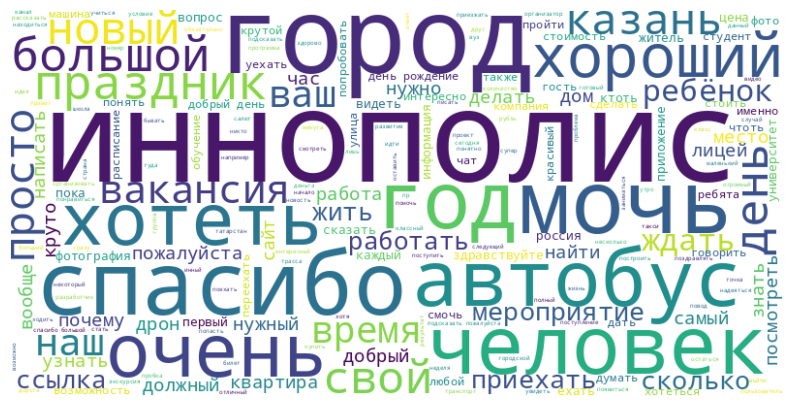

In [ ]:
# Создание облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud_1)

# Отображение облака слов
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Интересно отметить, что слово **"автобус"** часто встречается в комментариях. Можно предположить, что обсуждения вокруг этого термина касаются доступности общественного транспорта сообщающегося с другими городами.


Оценка тональности слов

In [ ]:
# Создаем объект TextBlob
blob = TextBlob(text_for_wordcloud_1)

# Получаем оценку тональности текста (в диапазоне от -1 до 1, где -1 - негативная, 1 - положительная)
sentiment_score = blob.sentiment.polarity

# Выводим результат
if sentiment_score > 0:
    print('Текст имеет положительную тональность.')
elif sentiment_score < 0:
    print('Текст имеет негативную тональность.')
else:
    print('Текст имеет нейтральную тональность.')

Текст имеет положительную тональность.


Выберем ключевые слова в комментариях и найдем посты, где они чаще всего употреблялись:

In [ ]:
# Определите ключевые фразы
key_phrases = ['хочу переехать', 'переезд', 'приехать', 'ищу работу','аренда']

# Используйте булевы условия для поиска строк, содержащих ключевые фразы
result_df = merge_df[merge_df['text_comment'].str.contains('|'.join(key_phrases), case=False)]
result_df_group = result_df.groupby('text').agg(count=('id','count'))
result_df_group = result_df_group.sort_values(by ='count',ascending = False)
# Сохраните текущее значение max_colwidth
original_max_colwidth = pd.get_option('display.max_colwidth')

# Установите максимальную ширину столбца только для этого DataFrame
pd.set_option('display.max_colwidth', None)

# Вывод столбцов 'id_post' и 'text_comment'
display(result_df_group)

# Восстановите исходное значение max_colwidth
pd.set_option('display.max_colwidth', original_max_colwidth)



,count
text,
"[немного цифр на сегодня](https://t.me/bezbuldyrabyz/24793). за семь лет иннополис вырос до 1% всех зарплат татарстана. то есть каждый специалист в иннополисе зарабатывает (а значит и платит налогов) в 2 раза больше, чем в среднем в регионе.",3
"сохраняй эти карточки о сегодняшнем празднике, они тебе ещё пригодятся",3
"подготовили для тебя майские обои и заставки. скорее устанавливай, чтобы иннополис всегда был с тобой 🤗\n\nфайлы в высоком качестве оставили в комментах",2
"1. голубь с флешками [передал 3 тб быстрее,](https://www.youtube.com/watch?v=4pz2kmxcu8i) чем широкополосная связь\n2. пользователи все больше [не доверяют ии](https://cointelegraph.com/news/consumers-increase-distrust-artificial-intelligence-salesforce-survey) и компаниям, которые его используют\n3. женщины стали [чаще интересоваться](https://www.rbc.ru/technology_and_media/31/08/2023/64ef765f9a7947365bd13f45) работой в it\n4. [исследование:](https://www.wired.com/story/the-myth-of-open-source-ai/) корпорациям выгоднее использовать в разработке ии опенсорс\n5. [ieee spectrum опубликовал](https://spectrum.ieee.org/the-top-programming-languages-2023) рейтинг популярных языков программирования в 2023 году \n6. microsoft подала заявку на патент [рюкзака с искусственным интеллектом](https://image-ppubs.uspto.gov/dirsearch-public/print/downloadpdf/20230267299)\n7. в россии [снижается спрос](https://www.cnews.ru/news/top/2023-08-29_inostrannye_yazyki_bolshe) на разработчиков с иностранными языками",1
frozen,1
врываемся в выходные ☺️,1
"динь-динь!\nэто напоминание, что до дня рождения иннополиса осталось 15 дней 😍\n\nв этом году программу впервые формировали сами жители. и вот, что у вас получилось:\n\n— начнем с лучших локальных групп иннополиса \n— впервые диджей-сет сыграет руслан шагалеев \n— за зажигательные треки отвечает виа «волга-волга» \n— обниматься будем под ламповые песни группы «свидание»\n\nа ещё нас ждет детская анимация и аквагрим, дженга с заданиями, большой праздничный торт, фотографии на полароид для городского альбома. закончим вечер самым невероятным салютом в истории иннополиса!\n\nждём тебя 9 июня в 16:00 на площади возле университета иннополис 🌆",1
"завтра большая и важная дискуссия для нашего города — обсудим развитие туризма в иннополисе\n\nо чем поговорим:\n• нужно ли иннополису много гостей?\n• важно ли историческое наследие и что делает иннополис особенным?\n• какую инфраструктуру важно развить в городе?\n• что делает обычных жителей амбассадорами?\n\nприглашаем тебя поразмышлять над будущим туризма. ты сможешь задать вопрос, поделиться предложениями или просто послушать спикеров. \n\nкогда: 29 ноября в 19:00\nгде: артспейс, зал брэдбери\n[регистрация](https://entermedia.timepad.ru/event/2679176/)",1
"ииии... снято!\n\nпровели пре-пати нового года: отправили 430 открыток близким, с жителями создали диджитал-ёлку размером с дом и подпевали сироткину под свет бенгальских огней ✨",1


Найдем темы, где они чаще всего употреблялись:

In [ ]:
filtered_df = df[df['id'].isin(result_df['id'])]
filtered_df = filtered_df.groupby('topic').agg(count = ('topic','count')).reset_index()
filtered_df.sort_values(by='count', ascending=False)

,topic,count
0,city_content,7
7,vacancy,3
1,city_events,1
2,education,1
3,fun_content,1
4,it_for_beginners,1
5,it_news,1
6,tourism,1


Вывод: Больше всего обсуждают переезд в комметариях в теме посты про город, жизнь в городе и постах про вакансии в Иннаполисе.

### 2.15. Анализ эмодзи

In [ ]:
# Новая таблица для хранения распаршенных данных
parsed_data = pd.DataFrame(columns=['id', 'emodzi', 'cnt_emodzi'])

# Функция для парсинга словарей в отдельные колонки и заполнения новой таблицы
def parse_reactions(row):
    parsed_rows = []
    try:
        reactions = ast.literal_eval(row['reactions'])
        for reaction in reactions['results']:
            emoji = reaction['reaction'].get('emoticon', None)
            count = reaction['count']
            parsed_rows.append({'id': row['id'], 'emodzi': emoji, 'cnt_emodzi': count})
    except Exception as e:
        print(f"Error: {e}")
    return parsed_rows

# Применение функции к каждой строке и заполнение новой таблицы
for index, row in df.iterrows():
    parsed_rows = parse_reactions(row)
    parsed_data = parsed_data.append(parsed_rows, ignore_index=True)

Error: invalid syntax (<unknown>, line 0)
Error: invalid syntax (<unknown>, line 0)
Error: invalid syntax (<unknown>, line 0)
Error: invalid syntax (<unknown>, line 0)
Error: invalid syntax (<unknown>, line 0)


In [ ]:
# Группируем эмодзи
parsed_data_groupby = parsed_data.groupby('emodzi').agg(sum_emodzi = ('cnt_emodzi','sum')).reset_index()
# Сортируем
parsed_data_sorted = parsed_data_groupby.sort_values(by = 'sum_emodzi',ascending = False)
# Выводим топ 20
parsed_data_sorted_head = parsed_data_sorted.head(20)

In [ ]:
# Строим график
fig = px.treemap(parsed_data_sorted_head,
                 path=[px.Constant('emodzi'), 'emodzi'],
                 values=parsed_data_sorted_head['sum_emodzi'],
                 color=parsed_data_sorted_head['sum_emodzi'],
                 color_continuous_scale='YlGnBu',
                 color_continuous_midpoint=np.average(parsed_data_sorted_head['sum_emodzi']),
                 width=800,
                 height=400,
                 title='Топ-20 популярных реакций'
                )

# Увеличение текста на диаграмме
fig.update_layout(uniformtext=dict(minsize=15, mode='show'))

# Установка отступов
fig.update_layout(margin=dict(t=40, l=25, r=25, b=25))

# Показать график
fig.show()

Выделим тональность эмоций

In [ ]:
# нейтральные эмодзи - neutral_emodzi
# None - это эмодзи иннополиса
neutral_emodzi = ['👀','🏆','🎄','🍓','✍','🎅','🦄','☃','🍾','🤔','🤝', '🌚', '🐳','👻','👾', '👨\u200d💻','🤓','None' ]
# негативные эмодзи - bad_emodzi
bad_emodzi = ['👎','🗿','😐']
# хорошие эмодзи - good_emodzi
good_emodzi = ['🔥','👍','❤','👏','🆒','❤\u200d🔥','💯','🥰','💘','🎉','😍','⚡','🙏', '🤗','👌','😈','🤣','😁','😎']

In [ ]:
# Создадим отделтные датасеты отсортированные по типу эмоджи
neutral = parsed_data_sorted.query('@neutral_emodzi == emodzi')
bad = parsed_data_sorted.query('@bad_emodzi == emodzi')
good = parsed_data_sorted.query('@good_emodzi == emodzi')
# Посчитаем проценты
proc_bad = bad.sum_emodzi.sum()/parsed_data_sorted.sum_emodzi.sum()
proc_good = good.sum_emodzi.sum()/parsed_data_sorted.sum_emodzi.sum()
proc_neutral = neutral.sum_emodzi.sum()/parsed_data_sorted.sum_emodzi.sum()

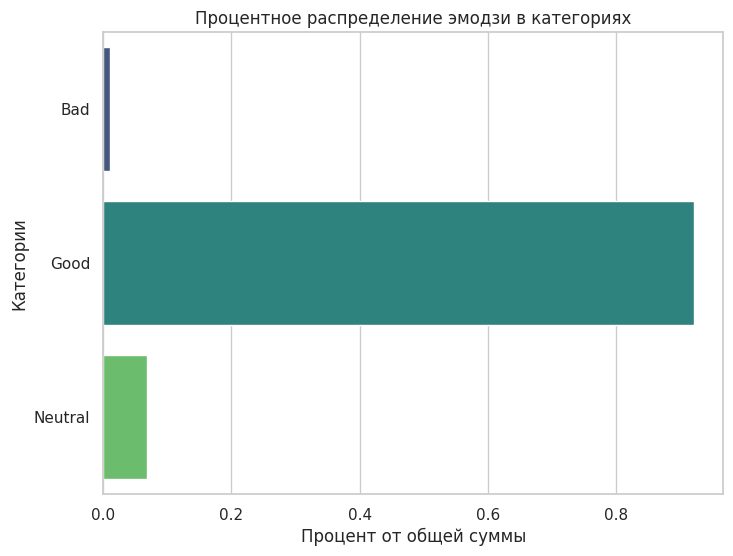

In [ ]:
# Создание DataFrame для данных
data = {'Категории': ['Bad', 'Good', 'Neutral'],
        'Процент от общей суммы': [proc_bad, proc_good, proc_neutral]}

# Создание DataFrame и сортировка по категориям
df_emodzi_category = pd.DataFrame(data)


# Создание столбчатой диаграммы с Seaborn (вертикальная)
plt.figure(figsize=(8, 6))
sns.barplot(x='Процент от общей суммы', y='Категории', data=df_emodzi_category, palette='viridis')

# Настройка осей и заголовка
plt.xlabel('Процент от общей суммы')
plt.ylabel('Категории')
plt.title('Процентное распределение эмодзи в категориях')

# Отображение столбчатой диаграммы
plt.show()



Из общего числа реакций наибольшую долю составляют положительные эмодзи, составляющие 92%. В то время как доля отрицательных эмодзи минимальна и составляет всего 1%.

In [ ]:
# объединяем эмодзи с постами
new_merge = pd.merge(df, parsed_data, on = 'id', how = 'inner' )

In [ ]:
# Отфильтруем эмоции по тональности
new_merge['emotion'] = np.where(new_merge['emodzi'].isin(neutral_emodzi), 'neutral',
                                np.where(new_merge['emodzi'].isin(bad_emodzi), 'bad',
                                         np.where(new_merge['emodzi'].isin(good_emodzi), 'good', 'unknown' )))
# Удаляем не отфильтрованные
new_merge = new_merge[new_merge['emotion'] != 'unknown']

In [ ]:
# Создаем сводную таблицу
emotion_topic = pd.pivot_table(new_merge,
                               values='index',
                               index='topic',
                               columns='emotion',
                               aggfunc='count',
                               fill_value=0)
# Считаем процент плохих комментариев
emotion_topic['prcent_bad'] = emotion_topic['bad']/(emotion_topic['bad']+emotion_topic['good']+emotion_topic['neutral'])*100
# Считаем процент плохих комментариев
emotion_topic['prcent_good'] = emotion_topic['good']/(emotion_topic['bad']+emotion_topic['good']+emotion_topic['neutral'])*100
# Фильтруем и округляем
emotion_topic = emotion_topic.sort_values(by='prcent_bad', ascending=False).reset_index().round(1)
emotion_topic_1 = emotion_topic.sort_values(by='prcent_good', ascending=False).reset_index().round(1)

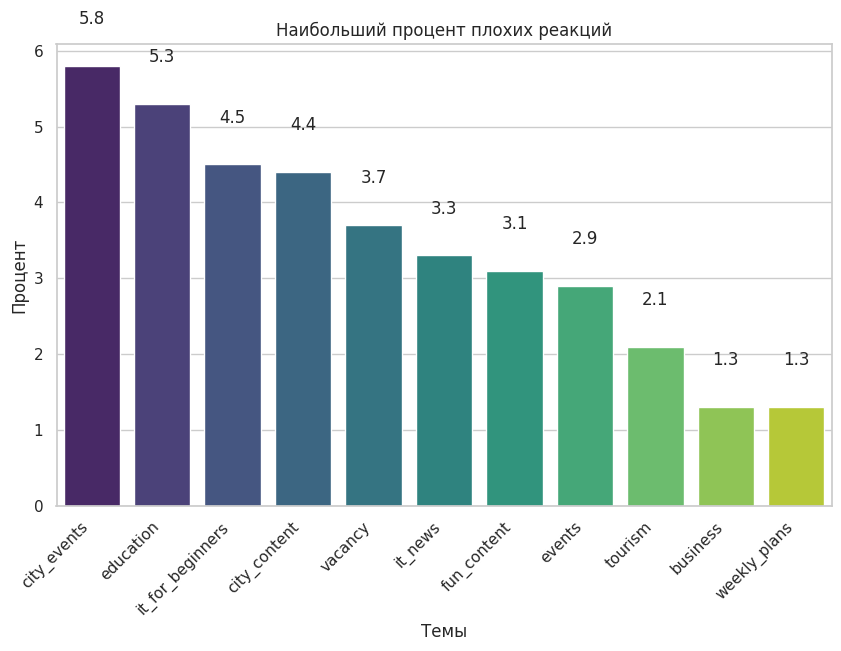

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='topic', y='prcent_bad', data=emotion_topic, palette='viridis')

plt.xlabel('Темы')
plt.ylabel('Процент')
plt.title('Наибольший процент плохих реакций')

# Поворот подписей оси X
plt.xticks(rotation=45, ha='right')  # ha='right' выровняет подписи справа

# Вывод значений над столбцами
for index, value in enumerate(emotion_topic['prcent_bad']):
    plt.text(index, value + 0.5, str(round(value, 2)), ha='center', va='bottom')

plt.show()


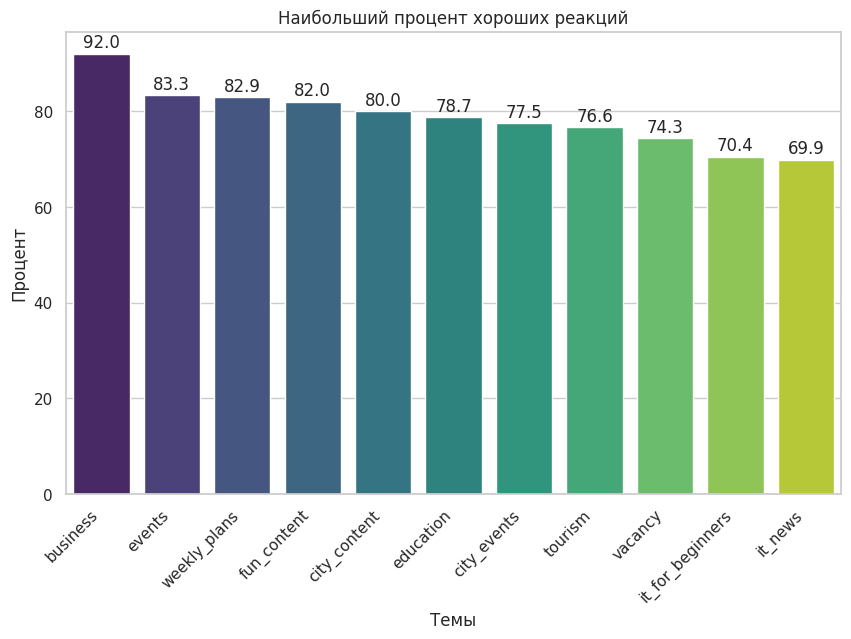

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='topic', y='prcent_good', data=emotion_topic_1, palette='viridis')

plt.xlabel('Темы')
plt.ylabel('Процент')
plt.title('Наибольший процент хороших реакций')

# Поворот подписей оси X
plt.xticks(rotation=45, ha='right')  # ha='right' выровняет подписи справа

# Вывод значений над столбцами
for index, value in enumerate(emotion_topic_1['prcent_good']):
    plt.text(index, value + 0.5, str(round(value, 2)), ha='center', va='bottom')

plt.show()



**Наиболее хорощие реакции у тем**

- business
- events
- weekly_plans



**Наиболее плохие реакции у тем**


- city_events
- education
- it for beginners



##  Выводы

Для решения задачи увеличения лояльной аудитории бренда путем увеличения количества подписчиков телеграм-канала @innopolistg был проведен анализ нынешнего состояния телеграм-канала города.

**Были проведен:**
- исследовательский анализ данных
- определены метрики эффективности поста
- проанализированы зависимости между эффективностью и свойствами поста
- проанализированы комментарии и реакции
- выделены темы постов для категоризации
- построено облако слов

**В качестве основных были выбраны следующие метрики эффективности постов:**

- вовлеченность на пост (ER) по просмотрам
- количество просмотров на пост

В качестве дополнительных в дальнейшем предлагаем также анализировать:

- количество постов в месяц/неделю
- количество комментариев про переезд, работу, получение образования в Иннаполисе.
- аналог NPS по эмодзи

**Были выявлены зависимости между уровнем вовлеченности и различными характеристиками постов.** Например, обнаружена тенденция, что уровень вовлеченности снижается с увеличением объема текста и количества символов, возможно, потому что большие посты могут не читаться до конца, затрудняя концентрацию внимания читателей.

Также выявлена положительная зависимость между уровнем вовлеченности и количеством реакций, а также комментариев. Это может указывать на то, что активность пользователей (реакции и комментарии) способствует повышению интереса к посту, что в свою очередь отражается на уровне вовлеченности.

Интересной является зависимость между вовлеченностью и наличием эмодзи в посте. Возможно, что визуальная привлекательность постов с эмодзи оказывает положительное воздействие на уровень вовлеченности.

**Были определены топ-3 наиболее и наименее популярных тем** по вовлеченности и по просмотрам (ознакомится можно в соответствующем разделе).Также выделили fun_content как наиболее комментируемую тему с большим отрывом от остальных.

Выявлено что по вовлеченности и по среднему количеству просмотров наименьшей популярностью пользуются просто текстовые посты, далее идут с фото и наиболее популярны с видео.

По часу и дню недели публикации поста не было выявлено их влияния на метрики эффективности, первоочередной является тема. И если не очень популярная регулярная рубрика публикуется в определенный день и час, то показатели именно в это время будут хуже.

Из полученных данных на основании времени коментирования можно предположить что среднее время жизни поста 2,5 дня. Но эта гипотеза требует подтверждения по данным времени просмотров и времени публикации реакций.

**В целом по каналу отмечено, что есть тенденция к снижению вовлеченности на пост от месяца к месяцу.** При этом просмотры на пост и за месяц растут в связи с ростом аудитории канала.

**При анализе комментариев** было построено облако слов с определением положительной тональности комментариев. Также были выявлены посты и темы, в которых чаще всего упоминается желание переехать, в частности, это относится к постам о городе и вакансиям в Иннополисе.

**Анализ эмодзи** позволил выявить самые популярные реакции среди подписчиков. Определена тональность эмодзи, а также выявлены темы, к которым чаще всего ставят плохие (city_events, education) и хорошие (business) реакции. Меньше всего хороших реакций ставят на новости об it.